<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
# Display column names
print("Column Names:")
print(df.columns)

# Display data types and non-null counts
print("\nData Types and Non-Null Counts:")
print(df.info())

# Display basic summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())


Column Names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Summary Statistics for Numerical Columns:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.0

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
# Identify missing values in each column
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

# Example strategy: Fill missing values in 'Employment' and 'RemoteWork' with the most frequent value
for col in ['Employment', 'RemoteWork']:
    most_frequent = df[col].mode()[0]
    df[col] = df[col].fillna(most_frequent)

# Example strategy: Drop rows where 'JobSat' is missing (critical for analysis)
df = df.dropna(subset=['JobSat'])

# Verify that missing values have been handled
print("\nMissing Values After Imputation/Removal:")
print(df.isnull().sum())


Missing Values per Column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Missing Values After Imputation/Removal:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork                 0
                       ...  
JobSatPoints_11          117
SurveyLength             406
SurveyEase               374
ConvertedCompYearly    13051
JobSat                     0
Length: 114, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
## Write your code here
# Analyze the distribution of Employment
employment_counts = df['Employment'].value_counts()
print("Employment Distribution:")
print(employment_counts)

# Analyze the distribution of Job Satisfaction (JobSat)
jobsat_counts = df['JobSat'].value_counts()
print("\nJob Satisfaction Distribution:")
print(jobsat_counts)

# Analyze the distribution of Years of Professional Coding Experience (YearsCodePro)
yearscodepro_counts = df['YearsCodePro'].value_counts()
print("\nYears of Professional Coding Experience Distribution:")
print(yearscodepro_counts)


Employment Distribution:
Employment
Employed, full-time                                                                                                                    22537
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                2291
Independent contractor, freelancer, or self-employed                                                                                    1245
Employed, part-time                                                                                                                      534
Employed, full-time;Student, part-time                                                                                                   509
                                                                                                                                       ...  
Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employ

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


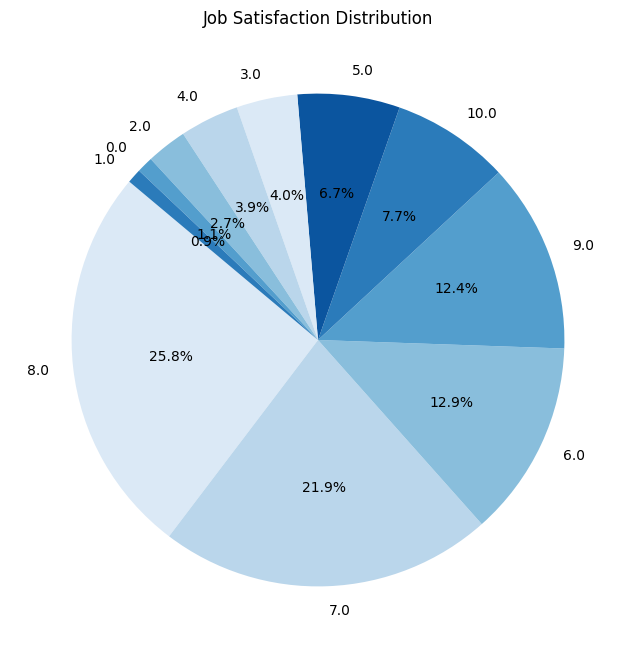

Interpretation:
The pie chart shows the relative proportions of different levels of job satisfaction among respondents. 
This helps identify which satisfaction levels are most common and highlights the overall sentiment in the survey population.


In [6]:
## Write your code here
# Drop missing values for JobSat
jobsat_data = df['JobSat'].dropna()

# Pie chart visualization
plt.figure(figsize=(8,8))
jobsat_counts = jobsat_data.value_counts()
plt.pie(jobsat_counts, labels=jobsat_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues"))
plt.title('Job Satisfaction Distribution')
plt.show()

# Interpretation
print("Interpretation:")
print("The pie chart shows the relative proportions of different levels of job satisfaction among respondents. ")
print("This helps identify which satisfaction levels are most common and highlights the overall sentiment in the survey population.")


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


<Figure size 1200x600 with 0 Axes>

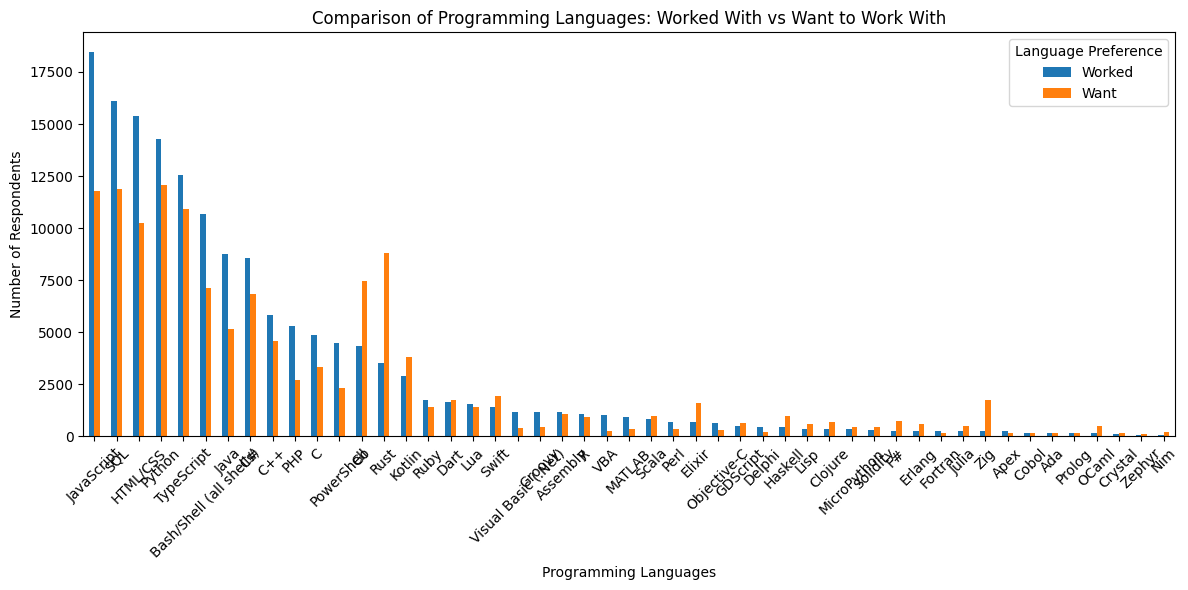

In [7]:
## Write your code here
worked_languages = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode().value_counts()
want_languages = df['LanguageWantToWorkWith'].dropna().str.split(';').explode().value_counts()

# Create a DataFrame for plotting comparison
lang_df = pd.DataFrame({
    'Worked': worked_languages,
    'Want': want_languages
}).fillna(0).sort_values('Worked', ascending=False)

# Plot a grouped bar chart
plt.figure(figsize=(12,6))
lang_df.plot(kind='bar', figsize=(12,6))
plt.title('Comparison of Programming Languages: Worked With vs Want to Work With')
plt.ylabel('Number of Respondents')
plt.xlabel('Programming Languages')
plt.xticks(rotation=45)
plt.legend(title='Language Preference')
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


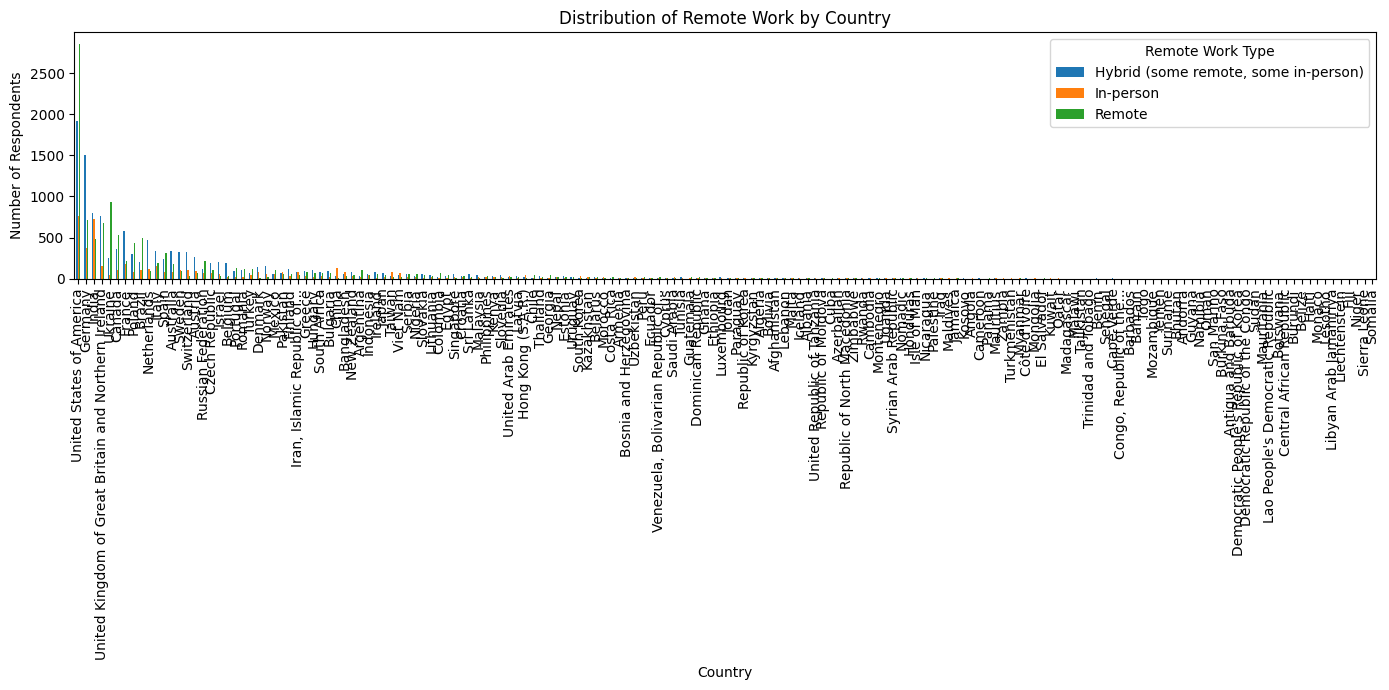

In [10]:
## Write your code here
# Prepare data for visualization: count RemoteWork by Country
remote_counts = df.groupby(['Country', 'RemoteWork']).size().unstack(fill_value=0)

# Sort countries by total responses for better readability
remote_counts['Total'] = remote_counts.sum(axis=1)
remote_counts = remote_counts.sort_values('Total', ascending=False).drop(columns='Total')

# Plot a grouped bar chart
remote_counts.plot(kind='bar', stacked=False, figsize=(14,7))
plt.title('Distribution of Remote Work by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.legend(title='Remote Work Type')
plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [12]:
## Write your code here
# Ensure numeric conversion
df['JobSatScore'] = df['JobSat'].astype('category').cat.codes
df['YearsCodeProNumeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing values
corr_data = df[['JobSatScore', 'YearsCodeProNumeric']].dropna()

# Pearson correlation
pearson_corr = corr_data['JobSatScore'].corr(corr_data['YearsCodeProNumeric'], method='pearson')

# Spearman correlation manually using ranks
spearman_corr = corr_data['JobSatScore'].rank().corr(corr_data['YearsCodeProNumeric'].rank())

pearson_corr, spearman_corr

(np.float64(0.1033650089907377), np.float64(0.12068519828581024))

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_1035/3649700396.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


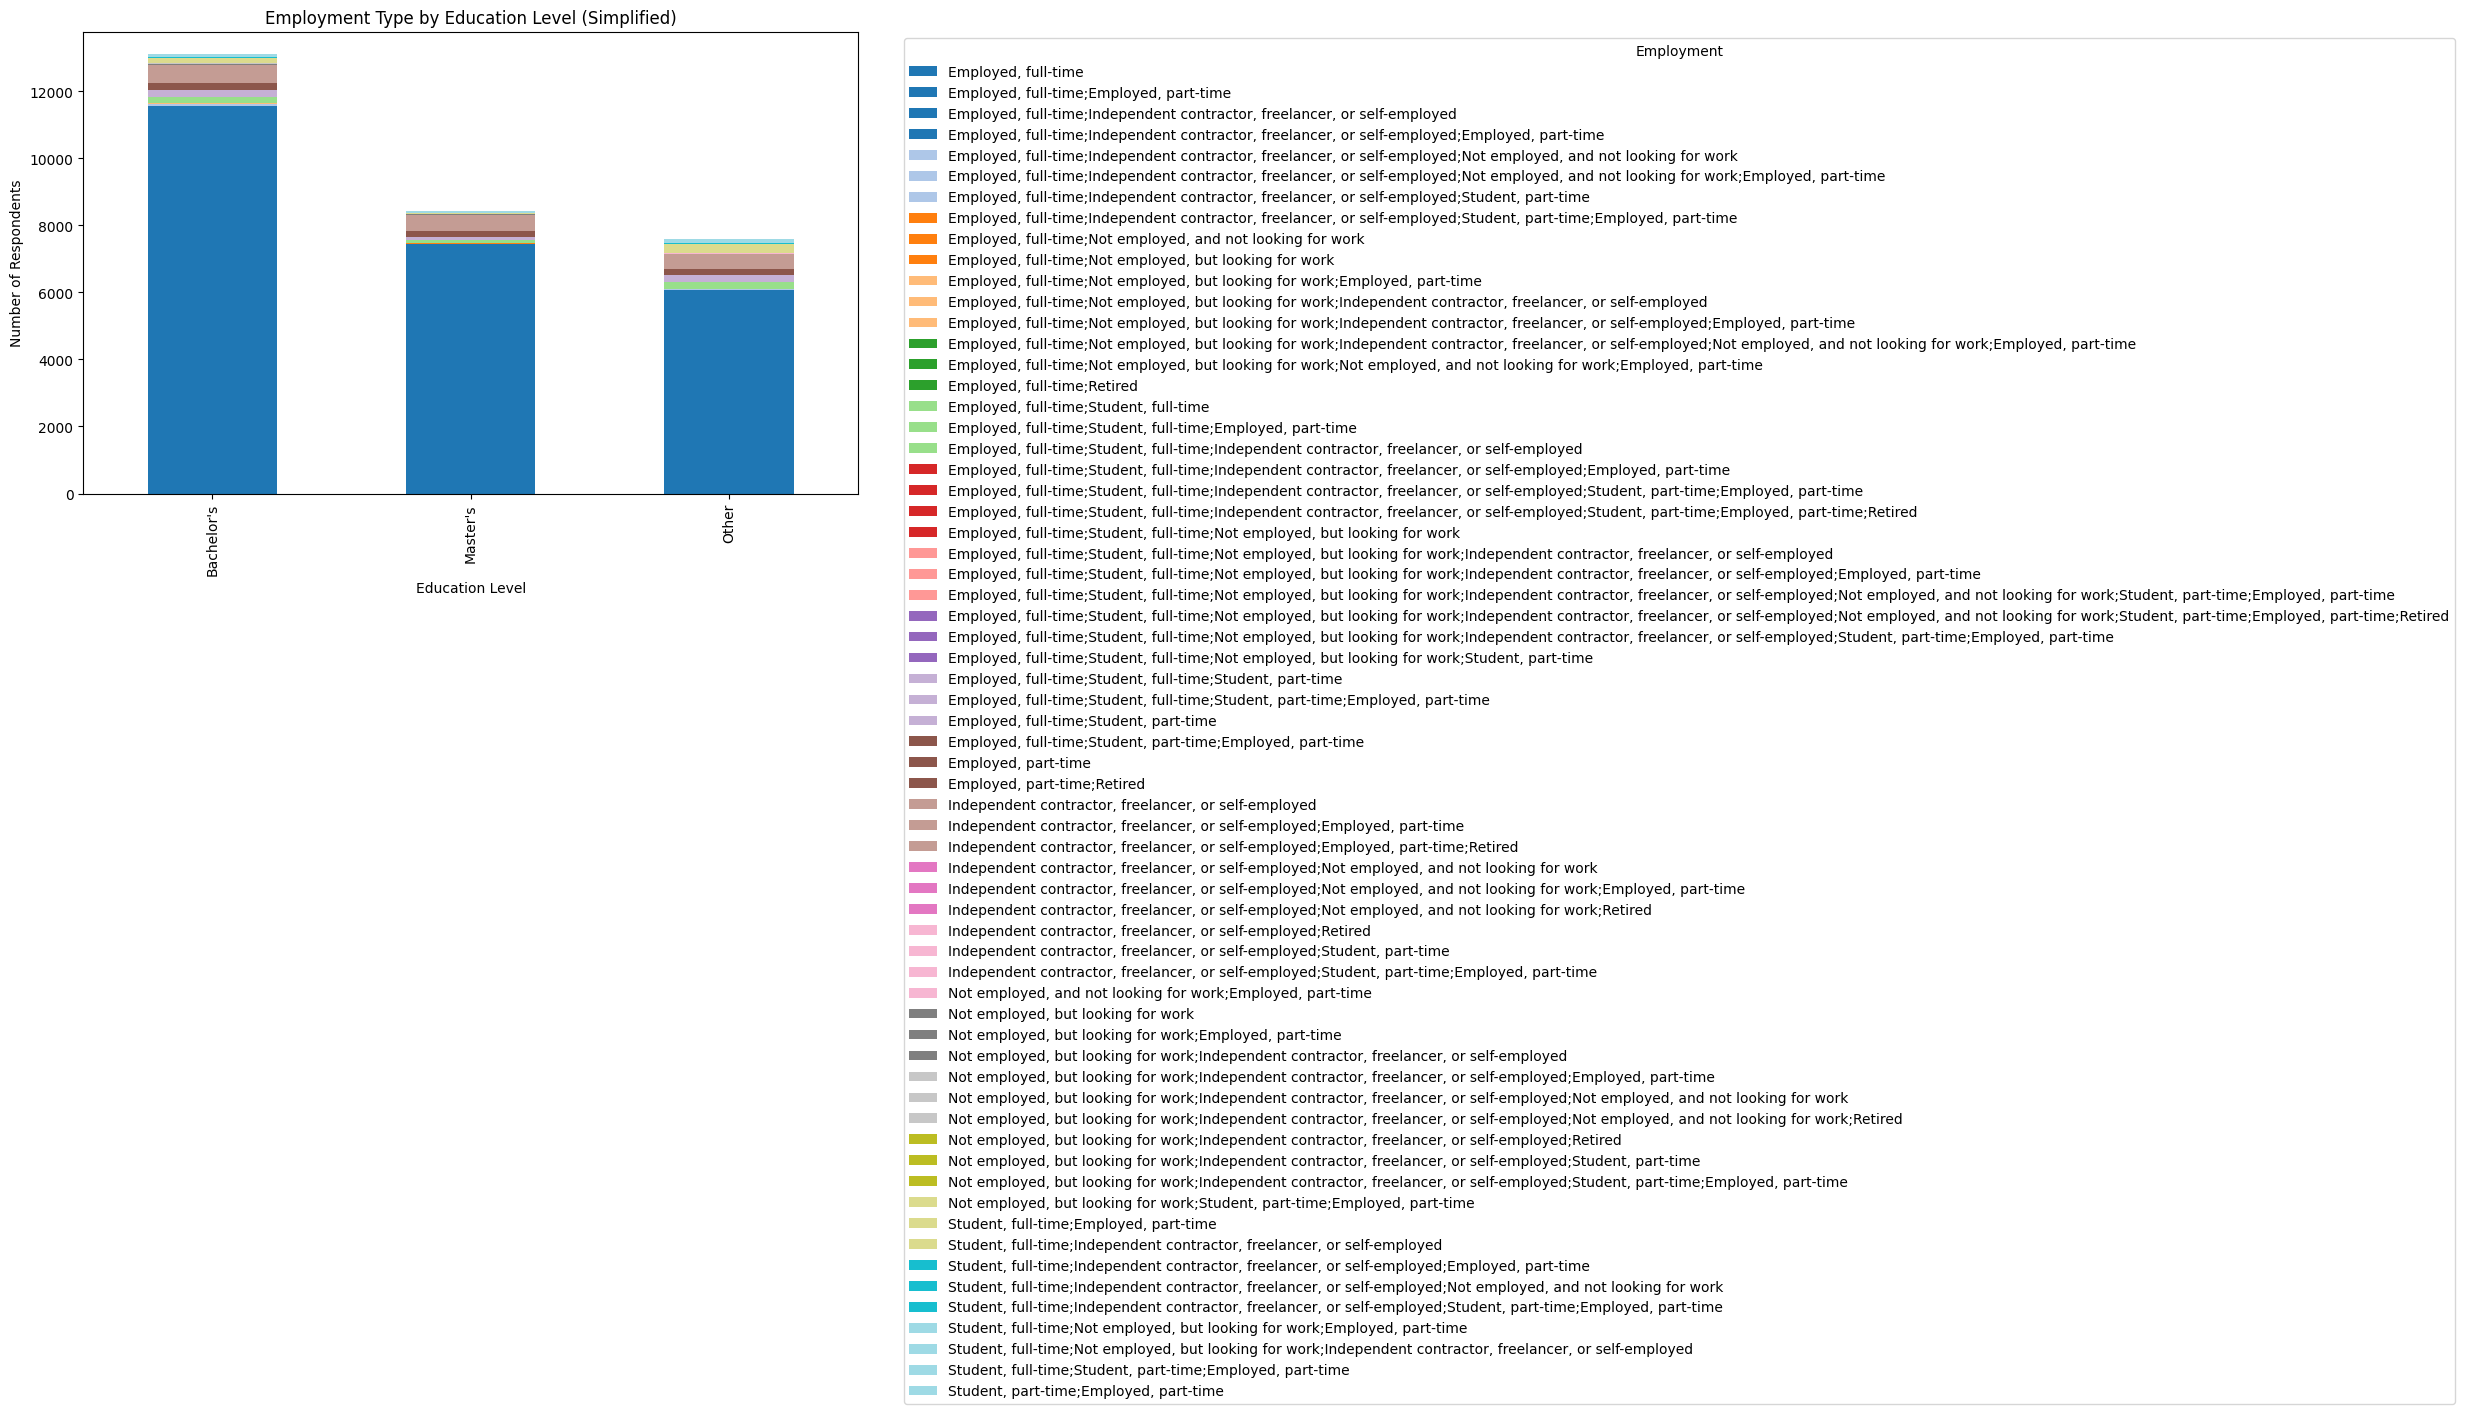

In [15]:
## Write your code here
# Simplify education levels
# Simplify EdLevel into broader categories
def simplify_education(level):
    if pd.isna(level):
        return 'Unknown'
    elif 'Bachelor' in level:
        return "Bachelor's"
    elif 'Master' in level:
        return "Master's"
    elif 'Doctoral' in level or 'PhD' in level:
        return "Doctoral"
    else:
        return "Other"

df['EdLevelSimplified'] = df['EdLevel'].apply(simplify_education)

# Create cross-tabulation
ct = pd.crosstab(df['EdLevelSimplified'], df['Employment'])

# Plot stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Employment Type by Education Level (Simplified)')
plt.ylabel('Number of Respondents')
plt.xlabel('Education Level')
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [16]:
## Write your code here
df.to_csv("stack_overflow_survey_cleaned.csv", index=False)

print("Cleaned dataset saved as 'stack_overflow_survey_cleaned.csv'.")

Cleaned dataset saved as 'stack_overflow_survey_cleaned.csv'.


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
